In [1]:
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

model = YOLO("yolov8n.pt")   # Nano = fastest


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


--2025-11-27 17:18:28--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 198.202.211.1
Connecting to ultralytics.com (ultralytics.com)|198.202.211.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2025-11-27 17:18:29--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 198.202.211.1, 2620:cb:2000::1
Connecting to www.ultralytics.com (www.ultralytics.com)|198.202.211.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg [following]
--2025-11-27 17:18:29--  https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

(np.float64(-0.5), np.float64(809.5), np.float64(1079.5), np.float64(-0.5))

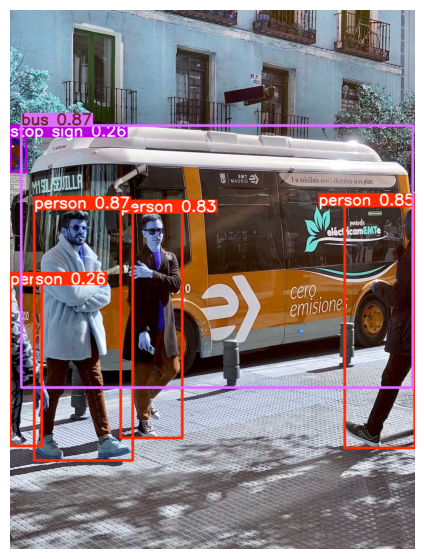

In [4]:
!wget https://ultralytics.com/images/bus.jpg -O bus.jpg

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("yolov8n.pt")

image_path = "/content/bus.jpg"
results = model(image_path)

annotated = results[0].plot()
plt.figure(figsize=(7,7))
plt.imshow(annotated)
plt.axis('off')


In [6]:
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.mp4 -O sample_video.mp4
import cv2

# Upload your video OR use a sample
video_path = "/content/sample_video.mp4"

cap = cv2.VideoCapture(video_path)

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter("output_yolo.mp4", fourcc, 30, (640, 480))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated = results[0].plot()
    annotated = cv2.resize(annotated, (640, 480))

    out.write(annotated)

cap.release()
out.release()

print("✔ Video processing complete. Download output_yolo.mp4 from the left-side file panel.")


--2025-11-27 17:21:27--  https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.mp4
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-11-27 17:21:27 ERROR 404: Not Found.

✔ Video processing complete. Download output_yolo.mp4 from the left-side file panel.


In [7]:
model.export(format="onnx")


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (AMD EPYC 7B12)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 252ms
Prepared 6 packages in 1.46s
Installed 6 packages in 221ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime==1.24.0.dev20251031003
 + onnxslim==0.1.77

requirements: AutoUpdate success ✅ 2.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.77...
ONNX: export success ✅ 6.7s, saved as 'yolov8n.onnx' (12.3 MB)

Export complete (7.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=64

'yolov8n.onnx'